# 读取数据

In [1]:
import pandas as pd

data = pd.read_csv(r"D:\学习资料\项目资料\耳鸣中医知识图谱\neo4j\数据\新耳鸣数据纯数字.csv",encoding="gbk")
x = data.drop("中医辨证",axis=1)
y = data["中医辨证"] #0肾精亏损1肝火上扰2痰火郁结3脾胃亏虚4风热侵袭
columns = data.columns ## 列名称
features_name=data.columns[:-1]
classes=np.unique(y)
len(columns),features_name

<IPython.core.display.Javascript object>

(108,
 Index(['性别', '发病节气', '劳累', '噪音', '耳机使用', '锻炼', '压力', '感染', '抽烟', '饮酒',
        ...
        'INR', 'APTT', 'FIB', 'D-二聚体', 'TT', '年龄', '病程（月）', 'TEQ', 'THI',
        'VAS'],
       dtype='object', length=107))

      中医辨证   type
0        0  train
1        0  train
2        0  train
3        2  train
4        3  train
...    ...    ...
1260     2  train
1261     4  train
1262     1  train
1263     3  train
1264     3  train

[1265 rows x 2 columns]


E:\ProgramFiles\Anaconda\anaconda\envs\kzl2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:xlabel='中医辨证', ylabel='count'>

E:\ProgramFiles\Anaconda\anaconda\envs\kzl2\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramFiles\Anaconda\anaconda\envs\kzl2\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21307 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramFiles\Anaconda\anaconda\envs\kzl2\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36776 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramFiles\Anaconda\anaconda\envs\kzl2\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 35777 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramFiles\Anaconda\anaconda\envs\kzl2\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\ProgramFiles\Anaconda\anacond

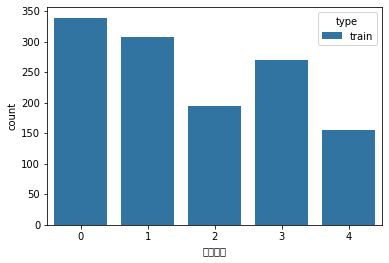

In [2]:
import seaborn as sns
train_label= data[['中医辨证']]
train_label['type'] = 'train'
label_all = pd.concat([train_label],axis=0)
print(label_all)
sns.countplot(x='中医辨证',hue='type', data=label_all)

In [3]:
from sklearn import preprocessing

minMaxs = preprocessing.MinMaxScaler()
data_minMax = minMaxs.fit_transform(x)
data_minMax

array([[1.        , 0.04166667, 1.        , ..., 0.45      , 0.18      ,
        0.1875    ],
       [0.        , 0.04166667, 1.        , ..., 0.35      , 0.22      ,
        0.09375   ],
       [0.        , 0.08333333, 1.        , ..., 0.55      , 0.42      ,
        0.25      ],
       ...,
       [1.        , 0.        , 1.        , ..., 0.8       , 0.44      ,
        0.28125   ],
       [1.        , 0.        , 1.        , ..., 0.75      , 0.46      ,
        0.28125   ],
       [0.        , 0.        , 1.        , ..., 0.6       , 0.44      ,
        0.21875   ]])

In [4]:
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.utils import shuffle

def getKFoldData(data,fileName):
    df=data.sample(frac=1)
    x = data.drop("中医辨证",axis=1)
    y = data["中医辨证"]
    minMaxs = preprocessing.MinMaxScaler()
    data_minMax = minMaxs.fit_transform(x)
    # kfold = KFold(n_splits=5,random_state=666,shuffle=True)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=999)
    split_i=0
    for train_index, test_index  in kfold.split(data_minMax,y):
        split_i=split_i+1
        # print("test index: ", test_index)
        X_train,X_test=data_minMax[train_index],data_minMax[test_index]
        y_train,y_test=y[train_index],y[test_index]
        # print(Train["中医辨证"].value_counts(),Test["中医辨证"].value_counts())
        # Train.to_csv(f'./data/五折训练集纯数字{split_i}.csv')
        # Test.to_csv(f'./data/五折测试集纯数字{split_i}.csv')
getKFoldData(data,'五折测试集纯数字')

## 标准化

In [5]:
from sklearn import preprocessing

minMaxs = preprocessing.MinMaxScaler()
data_minMax = minMaxs.fit_transform(x)

## 划分数据集

In [6]:
X_train,X_test,y_train,y_test = train_test_split(data_minMax,y,test_size=0.3,random_state = 0)
X_train

<IPython.core.display.Javascript object>

array([[1.        , 0.75      , 1.        , ..., 0.55      , 0.18      ,
        0.15625   ],
       [1.        , 0.54166667, 1.        , ..., 0.25      , 0.08      ,
        0.0625    ],
       [1.        , 0.        , 1.        , ..., 0.55      , 0.28      ,
        0.09375   ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.4       , 0.22      ,
        0.15625   ],
       [1.        , 0.54166667, 1.        , ..., 0.45      , 0.32      ,
        0.09375   ],
       [1.        , 0.        , 1.        , ..., 0.55      , 0.16      ,
        0.09375   ]])

# 决策树

In [7]:
from sklearn import tree
# model = tree.DecisionTreeClassifier(max_depth= 8, min_samples_leaf= 2, min_samples_split= 7, random_state= 66,class_weight="balanced") #决策树实例化
model = tree.DecisionTreeClassifier(class_weight="balanced") #决策树实例化

KFold_Score_new(data,model,'DecisionTreeClassifier')


NameError: name 'KFold_Score_new' is not defined

In [ ]:
model = tree.DecisionTreeClassifier(class_weight="balanced") #决策树实例化
model.fit(X_train,y_train)
y_pre=model.predict(X_train)
y_pre_test=model.predict(X_test)
y_score = model.predict_proba(X_test)

y_pre,y_pre_test
y_test_binarize = label_binarize(y_pre_test, classes=classes)
auc_score1 = roc_auc_score(y_test, y_test_binarize,average='weighted',multi_class = 'ovo')
auc_score2 = roc_auc_score(y_test, y_score,average='weighted',multi_class = 'ovo')

print(auc_score1,auc_score2)

y_test_binarize,y_score

# 随机森林

In [ ]:
from sklearn import tree
# model = RandomForestClassifier(bootstrap=False, max_features=0.452660081319747, min_impurity_decrease=0,min_samples_leaf=6,max_depth= 6, 
#                        min_samples_split=10, min_weight_fraction_leaf=0,criterion='gini',n_jobs=1,n_estimators =512,
#                               warm_start=True,class_weight='balanced')
model = RandomForestClassifier(class_weight='balanced')
KFold_Score_new(data,model,'RandomForestClassifier')

# SVM

In [ ]:
from sklearn.svm import SVC
# model = svm.SVC(C=10, class_weight='balanced', probability=True,kernel='linear')
model = svm.SVC(class_weight='balanced',probability=True)
KFold_Score_new(data,model,'SVC')

# MLP

In [ ]:
from sklearn.neural_network import MLPClassifier


model = MLPClassifier(early_stopping=True,solver='sgd')
KFold_Score_new(data,model,'MLPClassifier')

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils.class_weight import compute_class_weight

model = KNeighborsClassifier(weights='distance')
KFold_Score_new(data,model,'KNeighborsClassifier')

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils.class_weight import compute_class_weight

model = KNeighborsClassifier(weights='distance')
KFold_Score_new(data,model,'KNeighborsClassifier')

0
1
2
3
4
指标报告               precision    recall  f1-score   support

           0       0.94      1.00      0.97        68
           1       0.92      0.98      0.95        61
           2       0.97      0.95      0.96        39
           3       1.00      0.89      0.94        54
           4       0.97      0.94      0.95        31

    accuracy                           0.96       253
   macro avg       0.96      0.95      0.96       253
weighted avg       0.96      0.96      0.96       253

0
1
2
3
4
指标报告               precision    recall  f1-score   support

           0       0.99      0.99      0.99        68
           1       0.94      1.00      0.97        61
           2       0.97      0.90      0.93        39
           3       0.98      0.96      0.97        54
           4       0.97      0.97      0.97        31

    accuracy                           0.97       253
   macro avg       0.97      0.96      0.97       253
weighted avg       0.97      0.97      0.97    

# naive_bayes

In [21]:
# 贝叶斯
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)
KFold_Score_new(data,model,'naive_bayes')


0
1
2
3
4
指标报告               precision    recall  f1-score   support

           0       0.92      0.96      0.94        68
           1       0.89      0.95      0.92        61
           2       0.97      0.92      0.95        39
           3       0.96      0.89      0.92        54
           4       0.97      0.94      0.95        31

    accuracy                           0.93       253
   macro avg       0.94      0.93      0.94       253
weighted avg       0.93      0.93      0.93       253

0
1
2
3
4
指标报告               precision    recall  f1-score   support

           0       0.99      0.97      0.98        68
           1       0.92      1.00      0.96        61
           2       0.97      0.90      0.93        39
           3       0.98      0.96      0.97        54
           4       0.97      0.97      0.97        31

    accuracy                           0.96       253
   macro avg       0.97      0.96      0.96       253
weighted avg       0.97      0.96      0.96    

# LogisticRegression

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
KFold_Score_new(data,model,'LogisticRegression')


0
1
2
3
4
指标报告               precision    recall  f1-score   support

           0       0.96      1.00      0.98        68
           1       0.94      0.95      0.94        61
           2       0.95      0.95      0.95        39
           3       0.98      0.91      0.94        54
           4       0.97      0.97      0.97        31

    accuracy                           0.96       253
   macro avg       0.96      0.95      0.96       253
weighted avg       0.96      0.96      0.96       253

0
1
2
3
4
指标报告               precision    recall  f1-score   support

           0       0.99      0.99      0.99        68
           1       0.97      1.00      0.98        61
           2       1.00      0.95      0.97        39
           3       0.98      0.98      0.98        54
           4       0.97      0.97      0.97        31

    accuracy                           0.98       253
   macro avg       0.98      0.98      0.98       253
weighted avg       0.98      0.98      0.98    

# 评价指标计算

## 图算法


In [ ]:
data = pd.read_csv(r"./outData新数据/递增结果/400递增结果.csv",encoding="gbk")#,encoding="gbk"
data=data.drop("Unnamed: 0",axis=1)
features_name=data.columns

data

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,auc

y_test=data["测试集证型"]
y_pre_test=data["出现次数最多证型"]
y_score = label_binarize(y_pre_test, classes=[0,1,2,3,4])
auc=roc_auc_score(y_test, y_score,average='weighted',multi_class = 'ovo')
auc

In [ ]:
y_test=data["测试集证型"]
y_pre_test=data["出现次数最多证型"]
y_score = label_binarize(y_pre_test, classes=[0,1,2,3,4])
auc=roc_auc_score(y_test, y_score,average='weighted',multi_class = 'ovo')
auc

In [ ]:
knowlege_graph_Score(data,"多知识")

In [ ]:
classes=np.unique(y)
classes

### knowlege_graph_Score

In [18]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,auc

def knowlege_graph_Score(data,filename):
    testScores=[]
    aucScores=[]
    f1Scores=[]
    precisions_test=[]
    recalls=[]
    speScores=[]
    kappas=[]
    #计算每一折
    accScore=np.zeros((5, 5))
    precisionScore=np.zeros((5, 5))
    recallScore=np.zeros((5, 5))
    f1Score=np.zeros((5, 5))
    aucScore=np.zeros((5, 5))
    speScore=np.zeros((5, 5))
    df=data.sample(frac=1)
    x = data.drop("中医辨证",axis=1)
    y = data["中医辨证"]
    classes=np.unique(y)

    split_i=0
    CIdata=pd.DataFrame()
    CIdata['分类']=["肾精亏损","肝火上扰","痰火郁结","脾胃亏虚","风热侵袭"]
    CIname='F1'
    for item in range(0,5):
        print(item)
        knowledge_graph_data=pd.read_csv(f"./outData新数据/{filename}/{item}中医辨证分类结果数字.csv",encoding="gbk")
        # y_test=knowledge_graph_data["Patient1中医辨证"]#无权重
        # y_test=knowledge_graph_data["测试集证型"]#图结果、无知识
        y_pre_test=knowledge_graph_data["出现次数最多证型"]
        y_score = label_binarize(y_pre_test, classes=classes)
        '''ROC曲线'''
        # roc_multiMethod(f"{filename}",y_test,y_score,classes)
        '''CI置信区间'''
        # CI=confidenceInterval(y_test,y_score,CIname) #0肾精亏虚1肝火上扰2痰火郁结3脾胃虚弱4风热侵袭
        # CIdata['折数'f'{split_i}'+'_c1']=CI['c1']
        # CIdata['折数'f'{split_i}'+'_c2']=CI['c2']
        # print(CIdata)
        # CIdata.to_csv(f'./modelsMulti/results/{filename}/CI_{CIname}.csv',encoding= "utf_8_sig",index= False)
        '''计算每一类的ROC'''
        y_test_binarize = label_binarize(y_test, classes=classes)
        # 设置种类
        n_classes = y_test_binarize.shape[1]
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        sum_TP=0
        confusion = confusion_matrix(y_test,y_pre_test,labels=classes)
        # print("kappa",kappa(confusion))
        for i in range(n_classes):
            print(i)
            sum_TP += confusion[i,i]
            fpr[i], tpr[i], _ = roc_curve(y_test_binarize[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
            # print(roc_auc)
        # print("特征重要性",ferature_importance(model,title,isFalse))
        print("指标报告",classification_report(y_test, y_pre_test))
        metrics_result = []
        for i in range(n_classes):
            # 逐步获取 真阳，假阳，真阴，假阴四个指标，并计算三个参数
            ALL = np.sum(confusion)
            # 对角线上是正确预测的
            TP = confusion[i, i]
            # 列加和减去正确预测是该类的假阳
            FP = np.sum(confusion[:, i]) - TP
            # 行加和减去正确预测是该类的假阴
            FN = np.sum(confusion[i, :]) - TP
            # 全部减去前面三个就是真阴
            TN = sum_TP - TP
            TN1 = ALL-TP-FP-FN
            #accuracy
            ACC=round((TP+TN1)/float(ALL), 4)
            #Precision
            P=TP/float(TP+FP)
            PRE=round(P, 4)
            #Recall\sensitivity
            R=TP/float(TP+FN)
            REC=round(R,4)
            #specificity
            SPC=round(TN1/float(TN1+FP),4)
            #F1
            F1=round((2*P*R)/(P+R),4)
            #auc
            AUC=round(roc_auc[i],4)
            accScore[i][split_i]=ACC
            precisionScore[i][split_i]=PRE
            recallScore[i][split_i]=REC
            f1Score[i][split_i]=F1
            speScore[i][split_i]=SPC
            aucScore[i][split_i]=AUC
        split_i=split_i+1
        #macro:求取每一类的F值之后求平均值
        #micro:每一类的预测结果都加起来之后再计算查准率、查全率、F值
        #weighted:将各类别的F值乘以该类在总样本中的占比进行加权计算
    testScores.append(accScore.mean(axis=1))
    precisions_test.append(precisionScore.mean(axis=1))
    recalls.append(recallScore.mean(axis=1)) #召回率/灵敏度
    speScores.append(speScore.mean(axis=1))
    f1Scores.append(f1Score.mean(axis=1))
    aucScores.append(aucScore.mean(axis=1))
    # print(accScore,precisionScore,recallScore,f1Score,speScore,aucScore)
    # kappas.append(kappa)
    #二维转为一维数组
    # names = 'testScores precisions_test recalls speScores f1Scores aucScores'.split()
    testScores=np.array(testScores)
    testScores=testScores.flatten()
    precisions_test=np.array(precisions_test)
    precisions_test=precisions_test.flatten()
    recalls=np.array(recalls)
    recalls=recalls.flatten()
    speScores=np.array(speScores)
    speScores=speScores.flatten()
    f1Scores=np.array(f1Scores)
    f1Scores=f1Scores.flatten()
    aucScores=np.array(aucScores)
    aucScores=aucScores.flatten()
    pd_score=pd.DataFrame(np.array([testScores,precisions_test,recalls,f1Scores,speScores,aucScores]))
    pd_names=pd.DataFrame(np.array(["accuracy","precision","recall","f1","specificity","aucScores"]))
    pd_score["评价指标"]=pd_names
    pd_score.to_csv(f'./outData新数据/算法对比/{filename}五折多分类评价指标.csv',mode = 'a',encoding= "utf_8_sig",index= False)
    print(pd_score)


## KFold_Score_new

In [20]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,auc
from numpy import *
import numpy as np
from tabulate import tabulate
from sklearn.preprocessing import label_binarize
from sklearn.utils.class_weight import compute_sample_weight
import warnings
from sklearn import preprocessing
warnings.filterwarnings("ignore")
def KFold_Score_new(data,model,fileName):
    testScores=[]
    aucScores=[]
    f1Scores=[]
    precisions_test=[]
    recalls=[]
    speScores=[]
    kappas=[]
    warnings.filterwarnings("ignore")
    #计算每一折
    accScore=np.zeros((5, 5))
    precisionScore=np.zeros((5, 5))
    recallScore=np.zeros((5, 5))
    f1Score=np.zeros((5, 5))
    aucScore=np.zeros((5, 5))
    speScore=np.zeros((5, 5))
    df=data.sample(frac=1)
    x = data.drop("中医辨证",axis=1)
    y = data["中医辨证"]
    classes=np.unique(y)
    '''数据归一化'''
    minMaxs = preprocessing.MinMaxScaler()
    data_minMax = minMaxs.fit_transform(x)
    '''五折划分数据集'''
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=999)
    split_i=0
    CIdata=pd.DataFrame()
    CIdata['分类']=["肾精亏损","肝火上扰","痰火郁结","脾胃亏虚","风热侵袭"]
    CIname='F1'
    for train_index, test_index  in kfold.split(data_minMax,y):
        # print("test index: ", test_index)
        X_train,X_test=data_minMax[train_index],data_minMax[test_index]
        y_train,y_test=y[train_index],y[test_index]    
        sample_weight=compute_sample_weight(class_weight='balanced', y=y_train)
        eval_set = [(X_train, y_train), (X_test,y_test)]
        model.fit(X_train, y_train)
        #fit函数不支持class_weight
        # model.fit(X_train,y_train,early_stopping_rounds=10,eval_set=eval_set,verbose=0,sample_weight=sample_weight)
        y_pre=model.predict(X_train)
        y_pre_test=model.predict(X_test)
        y_score = model.predict_proba(X_test)
        '''ROC曲线'''
        # roc_multiMethod(f"{fileName}",y_test,y_score,classes)        
        # CI=confidenceInterval(y_test,y_pre_test,CIname) #0肾精亏损1肝火上扰2痰火郁结3脾胃亏虚4风热侵袭
        # CIdata['折数'f'{split_i}'+'_c1']=CI['c1']
        # CIdata['折数'f'{split_i}'+'_c2']=CI['c2']
        # print(CIdata)
        # CIdata.to_csv(f'./modelsMulti/results/{fileName}/CI_{CIname}.csv',encoding= "utf_8_sig",index= False)
        # print("accuracytest_score",accuracy_score(y_test,y_pre_test),accuracy_score(y_train,y_pre))
        # 计算每一类的ROC
        y_test_binarize = label_binarize(y_test, classes=classes)
        # 设置种类
        n_classes = y_test_binarize.shape[1]
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        sum_TP=0
        confusion = confusion_matrix(y_test,y_pre_test,labels=classes)
        # print("kappa",kappa(confusion))
        for i in range(n_classes):
            print(i)
            sum_TP += confusion[i,i]
            fpr[i], tpr[i], _ = roc_curve(y_test_binarize[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        # print("特征重要性",ferature_importance(model,title,isFalse))
        print("指标报告",classification_report(y_test, y_pre_test))
        metrics_result = []
        for i in range(n_classes):
            # 逐步获取 真阳，假阳，真阴，假阴四个指标，并计算三个参数
            ALL = np.sum(confusion)
            # 对角线上是正确预测的
            TP = confusion[i, i]
            # 列加和减去正确预测是该类的假阳
            FP = np.sum(confusion[:, i]) - TP
            # 行加和减去正确预测是该类的假阴
            FN = np.sum(confusion[i, :]) - TP
            # 全部减去前面三个就是真阴
            TN = sum_TP - TP
            TN1 = ALL-TP-FP-FN
            #accuracy
            ACC=round((TP+TN1)/float(ALL), 4)
            #Precision
            P=TP/float(TP+FP)
            PRE=round(P, 4)
            #Recall\sensitivity
            R=TP/float(TP+FN)
            REC=round(R,4)
            #specificity
            SPC=round(TN1/float(TN1+FP),4)
            #F1
            F1=round((2*P*R)/(P+R),4)
            #auc
            AUC=round(roc_auc[i],4)
            accScore[i][split_i]=ACC
            precisionScore[i][split_i]=PRE
            recallScore[i][split_i]=REC
            f1Score[i][split_i]=F1
            speScore[i][split_i]=SPC
            aucScore[i][split_i]=AUC
            
        split_i=split_i+1
        #macro:求取每一类的F值之后求平均值
        #micro:每一类的预测结果都加起来之后再计算查准率、查全率、F值
        #weighted:将各类别的F值乘以该类在总样本中的占比进行加权计算
    testScores.append(accScore.mean(axis=1))
    precisions_test.append(precisionScore.mean(axis=1))
    recalls.append(recallScore.mean(axis=1)) #召回率/灵敏度
    speScores.append(speScore.mean(axis=1))
    f1Scores.append(f1Score.mean(axis=1))
    aucScores.append(aucScore.mean(axis=1))
    # print(accScore,precisionScore,recallScore,f1Score,speScore,aucScore)
    # kappas.append(kappa)
    #二维转为一维数组
    # names = 'testScores precisions_test recalls speScores f1Scores aucScores'.split()
    testScores=np.array(testScores)
    testScores=testScores.flatten()
    precisions_test=np.array(precisions_test)
    precisions_test=precisions_test.flatten()
    recalls=np.array(recalls)
    recalls=recalls.flatten()
    speScores=np.array(speScores)
    speScores=speScores.flatten()
    f1Scores=np.array(f1Scores)
    f1Scores=f1Scores.flatten()
    aucScores=np.array(aucScores)
    aucScores=aucScores.flatten()
    pd_score=pd.DataFrame(np.array([testScores,precisions_test,recalls,f1Scores,speScores,aucScores]))
    pd_names=pd.DataFrame(np.array(["accuracy","precision","recall","f1","specificity","roc_auc"]))
    pd_score["评价指标"]=pd_names
    pd_score.to_csv(f'./outData新数据/算法对比/{fileName}五折多分类评价指标.csv',mode = 'a',encoding= "utf_8_sig",index= False)
    print(pd_score)
    # print(testScores,precisions_test,recalls,speScores,f1Scores,aucScores)


## kappa

In [ ]:
from sklearn.metrics import confusion_matrix

def kappa(matrix):
    matrix = np.array(matrix)
    n = np.sum(matrix)
    sum_po = 0
    sum_pe = 0
    for i in range(len(matrix[0])):
        sum_po += matrix[i][i]
        row = np.sum(matrix[i, :])
        col = np.sum(matrix[:, i])
        sum_pe += row * col
    po = sum_po / n
    pe = sum_pe / (n * n)
    # print(po, pe)
    return (po - pe) / (1 - pe)
# matrix=confusion_matrix(y_test,y_pre_test,labels=[0,1,2,3,4])
# print(kappa(matrix))

# 置信区间

In [ ]:
from sklearn import tree
model = RandomForestClassifier(class_weight='balanced')

In [ ]:
from sklearn import preprocessing

df=data.sample(frac=1)
x = data.drop("中医辨证",axis=1)
y = data["中医辨证"]
classes=np.unique(y)
minMaxs = preprocessing.MinMaxScaler()
data_minMax = minMaxs.fit_transform(x)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=999)
for train_index, test_index  in kfold.split(data_minMax,y):
    # print("test index: ", test_index)
    X_train,X_test=data_minMax[train_index],data_minMax[test_index]
    y_train,y_test=y[train_index],y[test_index]    
    sample_weight=compute_sample_weight(class_weight='balanced', y=y_train)
    eval_set = [(X_train, y_train), (X_test,y_test)]
    model.fit(X_train, y_train)
    #fit函数不支持class_weight
    # model.fit(X_train,y_train,early_stopping_rounds=10,eval_set=eval_set,verbose=0,sample_weight=sample_weight)
    y_pre=model.predict(X_train)
    y_pre_test=model.predict(X_test)
    y_score = model.predict_proba(X_test)
    print("折数：")
    CI=confidenceInterval(y_test,y_score,'ACC')

In [ ]:
knowledge_graph_data=pd.read_csv(f"./outData新数据/图结果/5折_1分类结果.csv",encoding="gbk")
knowledge_graph_data

In [ ]:
ALL_data

In [ ]:
df

In [ ]:
n_classes=[0,1,2,3,4]
classes=[0]
filename="图结果"
bootstraps=100
result = []
ALL_data=pd.DataFrame(columns=["测试集证型","出现次数最多证型"])
for item in range(0,5):
    knowledge_graph_data=pd.read_csv(f"./outData新数据/图结果/5折_{item}分类结果.csv",encoding="gbk")
    ALL_data = pd.concat([ALL_data, knowledge_graph_data],ignore_index=True)
    y_test=knowledge_graph_data["测试集证型"]
    y_pre_test=knowledge_graph_data["出现次数最多证型"]
fold_size=len(y_pre_test)
prevalence=[]
syndrome_datas=[]
df=pd.DataFrame(columns=["测试集证型","出现次数最多证型"])
'''计算每个证型结果占比'''
for i in range(len(n_classes)):
    syndrome_data = ALL_data[ALL_data["测试集证型"]==i] #各个证型结果
    # print(syndrome_data)
    ratio=len(syndrome_data)/len(y_test)
    prevalence.append(ratio)
    syndrome_datas.append(syndrome_data)
'''从每个证型中按原比例随机抽取结果'''
for k in range(bootstraps):
    for m in range(len(n_classes)):
        new_data = syndrome_datas[m].sample(n = int(fold_size * prevalence[m]), replace=True)
        df = pd.concat([df, new_data],ignore_index=True)
    df=df.sample(frac=1.0)# 打乱顺序
    print(df)
    y_test_new=df["测试集证型"].astype('int64')
    y_pre_test_new=df["出现次数最多证型"].astype('int64')    
    '''使用混淆矩阵计算所有指标'''
    confusion=confusion_matrix(y_test_new,y_pre_test_new,labels=n_classes)
    print(confusion)
    metrics_result = []
    sum_TP=0
    for j in range(len(n_classes)):
        sum_TP+=confusion[j, j];
    '''逐步获取 真阳，假阳，真阴，假阴四个指标，并计算三个参数'''
    for v in range(len(n_classes)):
        ALL = np.sum(confusion)
        # 对角线上是正确预测的
        TP = confusion[v, v]
        # 列加和减去正确预测是该类的假阳
        FP = np.sum(confusion[:, v]) - TP
        # 行加和减去正确预测是该类的假阴
        FN = np.sum(confusion[v, :]) - TP
        # 全部减去前面三个就是真阴
        TN = sum_TP - TP
        TN1 = ALL-TP-FP-FN
        #accuracy
        ACC=round((TP+TN1)/float(ALL), 4)
        #Precision
        P=TP/float(TP+FP)
        PRE=round(P, 4)
        #Recall\sensitivity
        R=TP/float(TP+FN)
        REC=round(R,4)
        #specificity
        SPC=round(TN1/float(TN1+FP),4)
        #F1
        F1=round((2*P*R)/(P+R),4)
        metrics_result.append([F1])#精准度、敏感度、特异性,F1, PRE, REC, SPC, F1, AUC
    result.append(np.transpose(metrics_result))
result

## 使用预测值和预测结果计算CI

In [ ]:
n_classes=[0,1,2,3,4]
classes=[0]
filename="图结果"
bootstraps=100
result = []
for item in range(len(classes)):
    df=pd.DataFrame(columns=["测试集证型","出现次数最多证型"])
    knowledge_graph_data=pd.read_csv(f"./outData新数据/{filename}/5折_{item}分类结果.csv",encoding="gbk")
    y_test=knowledge_graph_data["测试集证型"]
    y_pre_test=knowledge_graph_data["出现次数最多证型"]
    fold_size=len(y_pre_test)
    prevalence=[]
    syndrome_datas=[]
    '''计算每个证型结果占比'''
    for i in range(len(n_classes)):
        syndrome_data = knowledge_graph_data[knowledge_graph_data["测试集证型"]==i] #各个证型结果
        # print(syndrome_data)
        ratio=len(syndrome_data)/len(y_test)
        prevalence.append(ratio)
        syndrome_datas.append(syndrome_data)
    '''从每个证型中按原比例随机抽取结果'''
    for k in range(bootstraps):
        for m in range(len(n_classes)):
            new_data = syndrome_datas[m].sample(n = int(fold_size * prevalence[m]), replace=True)
            df = pd.concat([df, new_data],ignore_index=True)
        df=df.sample(frac=1.0)# 打乱顺序
        print(df)
        y_test_new=df["测试集证型"].astype('int64')
        y_pre_test_new=df["出现次数最多证型"].astype('int64')    
        '''使用混淆矩阵计算所有指标'''
        confusion=confusion_matrix(y_test_new,y_pre_test_new,labels=n_classes)
        print(confusion)
        metrics_result = []
        sum_TP=0
        for j in range(len(n_classes)):
            sum_TP+=confusion[j, j];
        '''逐步获取 真阳，假阳，真阴，假阴四个指标，并计算三个参数'''
        for v in range(len(n_classes)):
            ALL = np.sum(confusion)
            # 对角线上是正确预测的
            TP = confusion[v, v]
            # 列加和减去正确预测是该类的假阳
            FP = np.sum(confusion[:, v]) - TP
            # 行加和减去正确预测是该类的假阴
            FN = np.sum(confusion[v, :]) - TP
            # 全部减去前面三个就是真阴
            TN = sum_TP - TP
            TN1 = ALL-TP-FP-FN
            #accuracy
            ACC=round((TP+TN1)/float(ALL), 4)
            #Precision
            P=TP/float(TP+FP)
            PRE=round(P, 4)
            #Recall\sensitivity
            R=TP/float(TP+FN)
            REC=round(R,4)
            #specificity
            SPC=round(TN1/float(TN1+FP),4)
            #F1
            F1=round((2*P*R)/(P+R),4)
            metrics_result.append([F1])#精准度、敏感度、特异性,F1, PRE, REC, SPC, F1, AUC
        result.append(np.transpose(metrics_result))
result

## confidenceInterval

In [ ]:
'''计算置信区间CI'''
statistics = np.array(result)
statistics = statistics.reshape(100, -1).T
cis = []
hangshu = np.shape(statistics)[0]
alpha = 0.95  # 是设定的可信区间, 可以理解为置信度; 数值是百分数,取值范围(0,1)
for i in range(0, hangshu):
    line = statistics[i, :]
    n = len(line)
    ci = stats.t.interval(alpha, n - 1, np.mean(line), stats.sem(line))
    ci1 = np.array(ci)
    cis.append(ci1)
cis = np.array(cis)
cis_csv = pd.DataFrame(cis, columns=['c1','c2'])
cis_csv

In [ ]:
'''计算置信区间CI'''
def confidenceInterval(solution,prediction,CIname):
    statistics = bootstrap_tinitus(solution, prediction, [0,1,2,3,4],len(prediction),CIname)
    statistics = statistics.reshape(100, -1).T
    cis = []
    hangshu = np.shape(statistics)[0]
    alpha = 0.95  # 是设定的可信区间, 可以理解为置信度; 数值是百分数,取值范围(0,1)
    for i in range(0, hangshu):
        line = statistics[i, :]
        n = len(line)
        ci = stats.t.interval(alpha, n - 1, np.mean(line), stats.sem(line))
        ci1 = np.array(ci)
        cis.append(ci1)
    cis = np.array(cis)
    cis_csv = pd.DataFrame(cis, columns=['c1','c2'])
    # cis_csv.to_csv(f'./modelsMulti/results/CI_{CIname}.csv',mode = 'a', encoding= "utf_8_sig",index= False,header=None)
    return cis_csv

## bootstrap_tinitus

In [ ]:
def bootstrap_tinitus1(y_test, y_pre_test, n_classes, fold_size, CIname, bootstraps = 100):
    result = []
    prevalence=[]
    syndrome_datas=[]
    '''计算每个证型结果占比'''
    for i in range(len(n_classes)):
        syndrome_data = y_test[y_test["测试集证型"]==i] #各个证型结果
        # print(syndrome_data)
        ratio=len(syndrome_data)/len(y_test)
        prevalence.append(ratio)
        syndrome_datas.append(syndrome_data)
    '''从每个证型中按原比例随机抽取结果'''
    for k in range(bootstraps):
        for m in range(len(n_classes)):
            new_data = syndrome_datas[m].sample(n = int(fold_size * prevalence[m]), replace=True)
            df = pd.concat([df, new_data],ignore_index=True)
        df=df.sample(frac=1.0)# 打乱顺序
        print(df)
        y_test_new=df["测试集证型"].astype('int64')
        y_pre_test_new=df["出现次数最多证型"].astype('int64')    
        '''使用混淆矩阵计算所有指标'''
        confusion=confusion_matrix(y_test_new,y_pre_test_new,labels=n_classes)
        print(confusion)
        metrics_result = []
        sum_TP=0
        for j in range(len(n_classes)):
            sum_TP+=confusion[j, j];
        '''逐步获取 真阳，假阳，真阴，假阴四个指标，并计算三个参数'''
        for v in range(len(n_classes)):
            ALL = np.sum(confusion)
            # 对角线上是正确预测的
            TP = confusion[v, v]
            # 列加和减去正确预测是该类的假阳
            FP = np.sum(confusion[:, v]) - TP
            # 行加和减去正确预测是该类的假阴
            FN = np.sum(confusion[v, :]) - TP
            # 全部减去前面三个就是真阴
            TN = sum_TP - TP
            TN1 = ALL-TP-FP-FN
            #accuracy
            ACC=round((TP+TN1)/float(ALL), 4)
            #Precision
            P=TP/float(TP+FP)
            PRE=round(P, 4)
            #Recall\sensitivity
            R=TP/float(TP+FN)
            REC=round(R,4)
            #specificity
            SPC=round(TN1/float(TN1+FP),4)
            #F1
            F1=round((2*P*R)/(P+R),4)
            metrics_result.append([F1])#精准度、敏感度、特异性,F1, PRE, REC, SPC, F1, AUC
        result.append(np.transpose(metrics_result))
result

In [ ]:
'''有放回的抽样bootstraps次
抽样样本大小为fold_size'''

def bootstrap_tinitus(y_test, y_pred_prob, classes, fold_size, CIname, bootstraps = 100):
    result = []
    df = pd.DataFrame(columns=['y', 'pred0'])
    df['y'] = y_test
    args = locals()
    for h in range(len(classes)):
        df['pred'+str(h)] = y_pred_prob[:,h]
    #动态赋值
    for j in range(len(classes)):
        args["df_{}".format(j)] = df[df.y == j]
    prevalence=[]
    for item in range(len(classes)):
        prevalence.append(len(args["df_{}".format(item)]) / len(df)) #y=j在y_test中占的比例

    for i in range(bootstraps):
        #随机抽取n行，replace是否为有放回抽样，True:有放回抽样，False:未放回抽样
        for m in range(len(classes)):
            args["sample{}".format(m)] = args["df_{}".format(m)].sample(n = int(fold_size * prevalence[m]), replace=True)
            # print("sample:",m,args["sample{}".format(m)])
        y_sample = np.concatenate([args["sample{}".format(0)].y.values, args["sample{}".format(1)].y.values, args["sample{}".format(2)].y.values,
                                   args["sample{}".format(3)].y.values, args["sample{}".format(4)].y.values,
                                  ])

        for n in range(len(classes)):
            args["pred_sample{}".format(n)]=np.vstack((args["sample{}".format(n)].pred0.values,args["sample{}".format(n)].pred1.values))
            args["pred_sample{}".format(n)]=np.vstack((args["pred_sample{}".format(n)],args["sample{}".format(n)].pred2.values))
            args["pred_sample{}".format(n)]=np.vstack((args["pred_sample{}".format(n)],args["sample{}".format(n)].pred3.values))
            args["pred_sample{}".format(n)]=np.vstack((args["pred_sample{}".format(n)],args["sample{}".format(n)].pred4.values))
            args["pred_sample{}".format(n)]=np.array(args["pred_sample{}".format(n)])
            args["pred_sample{}".format(n)]=args["pred_sample{}".format(n)].T
            # print("pred_sample:",n,args["pred_sample{}".format(n)])

        # print("pred_sample0",len(args["pred_sample{}".format(0)]))
        pred_sample_1=args["pred_sample{}".format(0)]
        for k in range(1,len(classes)):
            pred_sample_1=np.vstack((pred_sample_1,args["pred_sample{}".format(k)]))
            # print("pred_sample_1:",k,len(pred_sample_1))
        #将预测概率换为预测值
        y_pre_test=np.argmax(pred_sample_1,axis=1)
        # 计算每一类的ROC
        y_test_binarize = label_binarize(y_sample, classes=classes)
        # 设置种类
        n_classes = y_test_binarize.shape[1]
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        confusion = confusion_matrix(y_sample,y_pre_test,labels=classes)
        sum_TP=0
        for j in range(n_classes):
            sum_TP+=confusion[j, j];
        metrics_result = []
        for v in range(n_classes):
            fpr[v], tpr[v], _ = roc_curve(y_test_binarize[:, v], pred_sample_1[:, v])
            roc_auc[v] = auc(fpr[v], tpr[v])
            # 逐步获取 真阳，假阳，真阴，假阴四个指标，并计算三个参数
            ALL = np.sum(confusion)
            # 对角线上是正确预测的
            TP = confusion[v, v]
            # 列加和减去正确预测是该类的假阳
            FP = np.sum(confusion[:, v]) - TP
            # 行加和减去正确预测是该类的假阴
            FN = np.sum(confusion[v, :]) - TP
            # 全部减去前面三个就是真阴
            TN = sum_TP - TP
            TN1 = ALL-TP-FP-FN
            #accuracy
            ACC=round((TP+TN1)/float(ALL), 4)
            #Precision
            P=TP/float(TP+FP)
            PRE=round(P, 4)
            #Recall\sensitivity
            R=TP/float(TP+FN)
            REC=round(R,4)
            #specificity
            SPC=round(TN1/float(TN1+FP),4)
            #F1
            F1=round((2*P*R)/(P+R),4)
            #auc
            AUC=round(roc_auc[v],4)
            metrics_result.append([F1])#精准度、敏感度、特异性,F1, PRE, REC, SPC, F1, AUC
        result.append(np.transpose(metrics_result))
    # print(len(result))
    return np.array(result)

In [ ]:
boot_means = []
for  in range(10000):
   bootsample = data.sample(90, replace=True)
   mean = bootsample[bootsample['性别'] == 1]['体温'].mean()
   boot_means.append(mean)

# roc

## roc_multiMethod

In [ ]:
# 引入必要的库
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

def roc_multiMethod(title,y_test,y_score,classes):

    # 将标签二值化
    y_label = label_binarize(y_test, classes=classes)
    # 设置种类
    n_classes = y_label.shape[1]
    y_test = label_binarize(y_test, classes=classes)
    # print(y_score)
    # 计算每一类的ROC
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area（方法二）
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # # Compute macro-average ROC curve and ROC area（方法一）
    # # First aggregate all false positive rates
    # all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    # # Then interpolate all ROC curves at this points
    # mean_tpr = np.zeros_like(all_fpr)
    # for i in range(n_classes):
    #     mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    # # Finally average it and compute AUC
    # mean_tpr /= n_classes
    # fpr["macro"] = all_fpr
    # tpr["macro"] = mean_tpr
    # roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    lw=2
    #图片显示中文
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] =False #减号unicode编码
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    # plt.plot(fpr["macro"], tpr["macro"],
    #          label='macro-average ROC curve (area = {0:0.2f})'
    #                ''.format(roc_auc["macro"]),
    #          color='navy', linestyle=':', linewidth=4)
    # names=["肾精亏损", "肝火上扰", "痰火郁结","脾胃亏虚","风热侵袭"]
    # colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    # for i, color in zip(range(n_classes), colors):
    #     plt.plot(fpr[i], tpr[i], color=color, lw=lw,
    #              label='ROC of class {0} (area = {1:0.2f})'
    #              ''.format(names[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title+'ROC')
    plt.legend(loc="lower right")
    # plt.savefig(f'./{title}ROC曲线.png')#保存图片
    plt.show()


## 随着特征增加AUC的变化

In [ ]:
y_test,y_pre_test

In [ ]:
for item in range(0,5):
    print(item)
    knowledge_graph_data=pd.read_csv(f"./outData新数据/图结果/5折_{item}分类结果.csv",encoding="gbk")
    # y_test=knowledge_graph_data["Patient1中医辨证"]
    # y_pre_test=knowledge_graph_data["前20出现次数最多"]
    y_test=knowledge_graph_data["测试集证型"]
    y_pre_test=knowledge_graph_data["出现次数最多证型"]
    # y_test_new=df["测试集证型"].astype('int64')
    # y_pre_test_new=df["出现次数最多证型"].astype('int64')
    y_pre_binarize = label_binarize(y_pre_test, classes=classes)
    auc_score = roc_auc_score(y_test, y_pre_binarize,average='weighted',multi_class = 'ovo')
    print(auc_score)